In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import random

In [30]:
#df = pd.read_csv('groupA.txt')
df = pd.read_csv('groupB.txt')
#df = pd.read_csv('groupC.txt')



df.columns = ['Height','Weight','Sex']

In [33]:
#Normalize Height
df['Height'] = (df['Height'] - df['Height'].mean())/np.std(df['Height'])
#df['Height']

In [32]:
#Normalize Weight
df['Weight'] = (df['Weight'] - df['Weight'].mean())/np.std(df['Weight'])
#df['Weight']

In [5]:
# 

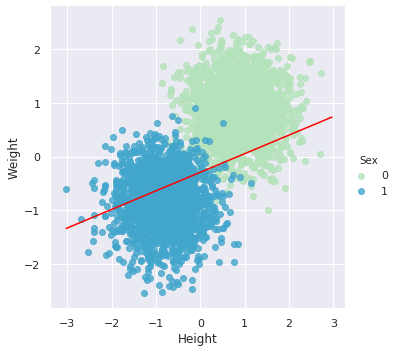

In [34]:
df_male = df[df['Sex']==0]
df_male

df_female = df[df['Sex']==1]
df_female

sns.lmplot( x="Height", y="Weight",data=df, hue = 'Sex', palette ='GnBu', fit_reg = False)

#x = np.arange(4,8)
#x = np.arrange(-4,3)

a = random.uniform(-0.5,0.5)
b = random.uniform(-0.5,0.5)

line_boundary = np.amax([abs(np.amin(df['Height'])), abs(np.amax(df['Height']))])
x = np.arange(-line_boundary,line_boundary)
y =(a)*x + b


#y = (-160/6.15)*x+285
#y = (-150/7)*x+275
#y = (-140/8)*x+255

plt.plot(x,y,'red') 
plt.show()

In [35]:
learningConstant = 0.3

#

In [7]:


net_output = []

for index, row in df_male.iterrows():
    x = row['Height']
    y = row['Weight']
    
    #net = (-160/6.15)*x+(-1)*y+285
    #net = (-150/7)*x+(-1)*y+275
    net = (-140/8)*x+(-1)*y+255
    
    #print(row['Height'], row['Weight'],net)
    net_output.append(net)
    
df_male['NEW'] = net_output
df_male.min()


/home/aboulhosnc/enter/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Height      0.242265
Weight      0.275221
Sex         0.000000
NEW       225.616113
dtype: float64

In [8]:


net_output = []

for index, row in df_female.iterrows():
    x = row['Height']
    y = row['Weight']
    
    #net = (-160/6.15)*x+(-1)*y+285
    #net = (-150/7)*x+(-1)*y+275
    net = (-140/8)*x+(-1)*y+255
    
    #print(row['Height'], row['Weight'],net)
    net_output.append(net)
    
df_female['NEW'] = net_output
df_female.min()

/home/aboulhosnc/enter/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Height     -1.652349
Weight     -1.701137
Sex         1.000000
NEW       261.417075
dtype: float64

In [9]:


net_output = []

for index, row in df.iterrows():
    x = row['Height']
    y = row['Weight']
    
    #net = (-160/6.15)*x+(-1)*y+285
    #net = ((-150/7)*x)+((-1)*y)+275
    net = (-140/8)*x+(-1)*y+255
    
    net_output.append(net)
    
df['NEW'] = net_output
df.min()

Height     -1.652349
Weight     -1.701137
Sex         0.000000
NEW       225.616113
dtype: float64

In [10]:
df_male.max()

Height      1.609814
Weight      1.790756
Sex         0.000000
NEW       249.811230
dtype: float64

In [11]:
df_female.max()

Height     -0.306845
Weight     -0.154970
Sex         1.000000
NEW       284.571880
dtype: float64

In [12]:
df_threshold = df_male['NEW'].max() - df_female['NEW'].min()
df_threshold = (df_threshold / float(2)) + df_female['NEW'].min()
df_threshold

255.61415253522506

In [13]:


guess = []

for index, row in df.iterrows():
    z = row['NEW']
    if z < 0:
        guess_out = 0
        guess.append(guess_out)
    else:
        guess_out = 1
        guess.append(guess_out)

df['Guess'] = guess
df
######################################

,Height,Weight,Sex,NEW,Guess
0,1.133535,0.540964,0,234.622172,1
1,0.694660,0.646618,0,242.196826,1
2,1.124379,0.892142,0,234.431222,1
3,0.932095,1.216033,0,237.472311,1
4,1.101296,1.196134,0,234.531180,1
5,1.134687,1.047689,0,234.095283,1
6,0.617817,0.813146,0,243.375049,1
7,0.978748,1.006866,0,236.865043,1
8,0.824390,0.811956,0,239.761220,1
9,0.973003,1.167643,0,236.804804,1


In [14]:
## CHECK THE GUESSES 
df['Check'] = df['Sex'] - df['Guess']
values = df.iloc[df['Check'].nonzero()]
print (values)
######################################

        Height    Weight  Sex         NEW  Guess  Check
0     1.133535  0.540964    0  234.622172      1     -1
1     0.694660  0.646618    0  242.196826      1     -1
2     1.124379  0.892142    0  234.431222      1     -1
3     0.932095  1.216033    0  237.472311      1     -1
4     1.101296  1.196134    0  234.531180      1     -1
5     1.134687  1.047689    0  234.095283      1     -1
6     0.617817  0.813146    0  243.375049      1     -1
7     0.978748  1.006866    0  236.865043      1     -1
8     0.824390  0.811956    0  239.761220      1     -1
9     0.973003  1.167643    0  236.804804      1     -1
10    0.832992  1.284863    0  239.137769      1     -1
11    0.830718  1.195277    0  239.267157      1     -1
12    0.969922  1.078276    0  236.948096      1     -1
13    0.759060  0.611087    0  241.105358      1     -1
14    0.733754  1.196469    0  240.962842      1     -1
15    1.102942  0.623997    0  235.074516      1     -1
16    0.977279  1.063832    0  236.833786      1

/home/aboulhosnc/enter/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
## COUNTING METRICS 
false_p = 0
false_n = 0
true_n = 0
true_p = 0
for index, row in df.iterrows():
    z = row['Check']
    w = row['Guess']
    if z == -1:
        false_p = false_p + 1
    elif z == 1:
        false_n = false_n + 1
    elif w == 0:
        true_n = true_n + 1
    elif w == 1:
        true_p = true_p +1
    
        
print(false_p, false_n, true_p, true_n)

#######################################

1999 0 2000 0


In [16]:
## ACCURACY AND ERROR 
acc = 0

acc = (float(true_p + true_n)/(true_p + true_n + false_p + false_n))
print (acc)

err = 1-acc
print(err)
######################################

0.5001250312578145
0.4998749687421855


In [17]:
## TRUE POSITIVE
tp = 0

tp = float(true_p)/(true_p + true_n)
print(tp)
######################################

1.0


In [18]:
## TRue Positive version two
tp2 = 0

tp2 = float(true_p)/(true_p + false_n)
print(tp2)


1.0


In [19]:
## TRUE NEGATIVE 
tn = 0

tn = float(true_n)/(true_p + true_n)
print(tn)
######################################

0.0


In [20]:
# True Negative version 2
tn2 = 0

tn2 = float(true_n)/(false_p + true_n)
print(tn2)


0.0


In [21]:
## FALSE POSITIVE
fp = 0

fp = float(false_p)/(false_p + false_n)
print(fp)
######################################

1.0


In [22]:
## False Positive Version two
fp2 = 0

fp2 = float(false_p)/(false_p + true_n)
print(fp2)


1.0


In [23]:
## FALSE NEGATIVE
fn = 0

fn = float(false_n)/(false_p + false_n)
print(fn)
######################################

0.0


In [24]:
## False Negative version 2
fn2 = 0

fn2 = float(false_n)/(true_p + false_n)
print (fn2)


0.0


In [25]:
## PRECISION
prec = 0

prec = float(true_p)/(true_p + false_p)
print(prec)
######################################

0.5001250312578145


In [26]:
print('y = (-150/7)*x+275')

y = (-150/7)*x+275


In [27]:
print('0 <= ((-150/7)*x)+((-1)*y)+275')

0 <= ((-150/7)*x)+((-1)*y)+275
